In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from eolearn.core import (
    AddFeatureTask,
    EONode,
    EOPatch,
    EOTask,
    EOWorkflow,
    FeatureType,
    LoadTask,
    OverwritePermission,
    SaveTask,
)

In [3]:
import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon

In [4]:
from pathlib import Path
import sys

SCRIPT_DIR = Path('/home/alina.smolina/eolearn-pipeline/src')
sys.path.append(str(SCRIPT_DIR))
SCRIPT_DIR = Path('/home/alina.smolina/DL-pipeline/src')
sys.path.append(str(SCRIPT_DIR))

In [5]:
eopatches_dir = '/beegfs/home/alina.smolina/data/arkhangelsk/EOPatches/2-filtered-deforestation-parsed-left-shore-32638-grid-2560x2560/'

## Preparing dataloader

In [46]:
eopatch = EOPatch.load(
    f'{eopatches_dir}eopatch_20', 
    lazy_loading=True, 
    features=([
        (FeatureType.DATA, 'BANDS'),
        (FeatureType.MASK_TIMELESS, 'PREVAIL_GROUP'),
              ]) # Set this parameter to True to load data in memory only when first needed
)

In [47]:
eopatch.get_features()

[(<FeatureType.DATA: 'data'>, 'BANDS'),
 (<FeatureType.MASK_TIMELESS: 'mask_timeless'>, 'PREVAIL_GROUP')]

In [48]:
e = eopatch.temporal_subset([3])

In [53]:
e[FeatureType.MASK_TIMELESS]['PREVAIL_GROUP'].squeeze()

array([[  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [49]:
e[FeatureType.DATA]['BANDS'].squeeze().shape

(256, 256, 10)

In [43]:
e[FeatureType.DATA]['BANDS'].squeeze().transpose(2, 0, 1).shape

(10, 256, 256)

In [26]:
dict_timestamps = {}
for i in range(0, 107):
    eopatch = EOPatch.load(f'{eopatches_dir}eopatch_{i}', lazy_loading=True)
    dict_timestamps[i] = len(eopatch.timestamps)

In [11]:
sum(dict_timestamps.values())

2666

In [12]:
len(dict_timestamps)

107

In [14]:
cumsum = [0] 
for v in dict_timestamps.values():
    cumsum += [cumsum[-1] + v]

In [15]:
cumsum

[0,
 34,
 68,
 102,
 136,
 170,
 204,
 238,
 272,
 298,
 324,
 350,
 376,
 402,
 428,
 454,
 480,
 506,
 532,
 558,
 584,
 610,
 636,
 662,
 688,
 714,
 740,
 766,
 792,
 818,
 844,
 870,
 896,
 922,
 948,
 974,
 1000,
 1026,
 1052,
 1078,
 1104,
 1130,
 1156,
 1182,
 1208,
 1234,
 1260,
 1286,
 1312,
 1338,
 1364,
 1390,
 1416,
 1442,
 1468,
 1493,
 1519,
 1545,
 1571,
 1597,
 1623,
 1649,
 1675,
 1701,
 1727,
 1753,
 1779,
 1805,
 1831,
 1856,
 1878,
 1903,
 1929,
 1955,
 1981,
 2007,
 2033,
 2055,
 2077,
 2095,
 2114,
 2139,
 2165,
 2191,
 2217,
 2239,
 2261,
 2279,
 2297,
 2315,
 2333,
 2354,
 2380,
 2402,
 2424,
 2442,
 2460,
 2478,
 2496,
 2514,
 2536,
 2558,
 2576,
 2594,
 2612,
 2630,
 2648,
 2666]

In [ ]:
eopatch.temporal_subset()

In [42]:
eopatch

EOPatch(
  bbox=BBox(((517120.0, 6817280.0), (519680.0, 6819840.0)), crs=CRS('32638'))
  timestamps=[2018-03-10 08:27:47, ...]<length=26>
  mask={
    CLM: numpy.ndarray(shape=(26, 256, 256, 1), dtype=uint8)
    IS_DATA: numpy.ndarray(shape=(26, 256, 256, 1), dtype=bool)
    IS_VALID: numpy.ndarray(shape=(26, 256, 256, 1), dtype=bool)
    SCL: numpy.ndarray(shape=(26, 256, 256, 1), dtype=uint8)
  }
  mask_timeless={
    PREVAIL_GROUP: numpy.ndarray(shape=(256, 256, 1), dtype=uint8)
  }
  data={
    BANDS: numpy.ndarray(shape=(26, 256, 256, 10), dtype=uint16)
    CLP: numpy.ndarray(shape=(26, 256, 256, 1), dtype=uint8)
  }
  vector_timeless={
    TAXATION_DATA: geopandas.GeoDataFrame(columns=['NOMKVR', 'KATZEM', 'NOMVYD', 'MEAN_V', 'MEAN_V1', 'MEAN_V2', 'MEAN_V3', 'MEAN_V4', 'MEAN_V8', 'MEAN_HGW', 'MEAN_HGW1', 'MEAN_HGW2', 'MEAN_HGW3', 'MEAN_HGW4', 'MEAN_HGW8', 'MEAN_DGW', 'MEAN_DGW1', 'MEAN_DGW2', 'MEAN_DGW3', 'MEAN_DGW4', 'MEAN_DGW8', 'MEAN_AGE', 'MEAN_AGE1', 'MEAN_AGE2', 'MEAN_AGE3',

In [59]:
eopatch.timestamps

[datetime.datetime(2018, 3, 10, 8, 27, 47),
 datetime.datetime(2018, 4, 6, 8, 16, 3),
 datetime.datetime(2018, 4, 11, 8, 16),
 datetime.datetime(2018, 4, 14, 8, 30, 52),
 datetime.datetime(2018, 4, 22, 8, 36, 1),
 datetime.datetime(2018, 4, 24, 8, 31, 14),
 datetime.datetime(2018, 5, 1, 8, 17, 35),
 datetime.datetime(2018, 5, 4, 8, 32, 19),
 datetime.datetime(2018, 5, 11, 8, 16, 1),
 datetime.datetime(2018, 5, 12, 8, 36, 2),
 datetime.datetime(2018, 5, 14, 8, 26, 29),
 datetime.datetime(2018, 5, 16, 8, 16, 19),
 datetime.datetime(2018, 5, 21, 8, 22, 44),
 datetime.datetime(2018, 5, 22, 8, 36, 2),
 datetime.datetime(2018, 6, 15, 8, 16, 16),
 datetime.datetime(2018, 7, 16, 8, 40, 11),
 datetime.datetime(2018, 7, 18, 8, 30, 10),
 datetime.datetime(2018, 7, 23, 8, 26, 48),
 datetime.datetime(2018, 7, 30, 8, 15, 59),
 datetime.datetime(2018, 7, 31, 8, 42, 4),
 datetime.datetime(2018, 8, 4, 8, 17, 51),
 datetime.datetime(2018, 8, 25, 8, 42, 35),
 datetime.datetime(2018, 8, 27, 8, 32, 8),
 da

In [44]:
from datetime import date
date.fromisoformat('2018-04-13')

datetime.date(2018, 4, 13)

In [53]:
from datetime import date
from datetime import datetime

date_range = ['2018-04-13', '2018-06-13']
date_range = [date.fromisoformat(d) for d in date_range]
date_range = [datetime.combine(d, datetime.min.time()) for d in date_range]
date1, date2 = date_range

In [54]:
subset_eopatch = eopatch.temporal_subset(lambda times: [date1 < t < date2 for t in times])

In [58]:
subset_eopatch[FeatureType.DATA]['BANDS'].shape

(11, 256, 256, 10)

array([[<AxesSubplot: ylabel='2018-05-01T08:17:35'>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: ylabel='2018-05-04T08:32:19'>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: ylabel='2018-05-11T08:16:01'>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

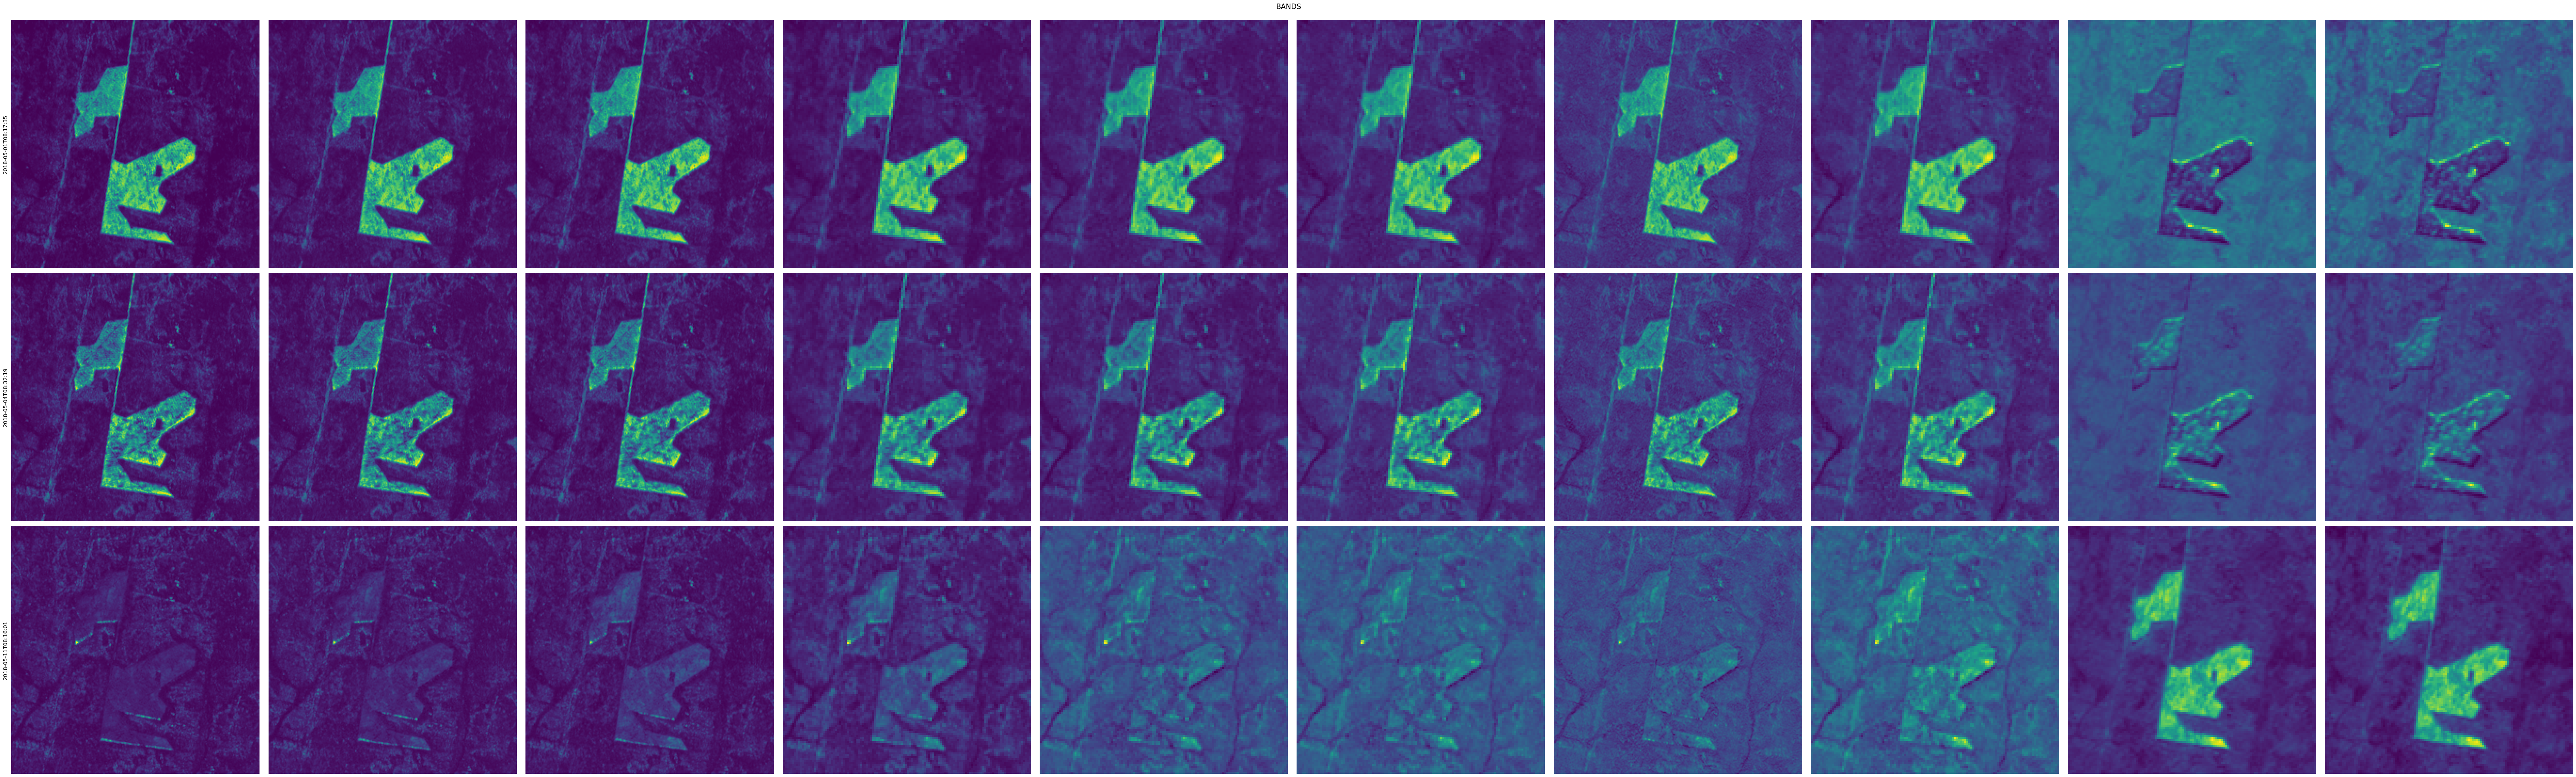

In [56]:
subset_eopatch.plot((FeatureType.DATA, 'BANDS'), times=slice(3,6))

In [ ]:
from eolearn.features import SimpleFilterTask

## Model

In [6]:
from albumentations.core.transforms_interface import ImageOnlyTransform
import numpy as np


def linear_normalize(img, a, b, c, d):
    a = np.array(a, dtype=np.float32)
    b = np.array(b, dtype=np.float32)
    c = np.array(c, dtype=np.float32)
    d = np.array(d, dtype=np.float32)
    img = img.astype(np.float32)
    
    coef = (b - a) * np.reciprocal((d - c))
    
    # img = (img - d) * coef + a
    img -= d
    img *= coef
    img += a
    return img


class Normalize_Linear(ImageOnlyTransform):
    """Normalization is applied by the formula: `img = (img - d) * (b - a) / (d - c) + a`

    Args:
        a, b, c, d (float, list of float): mean values

    Targets:
        image

    Image types:
        uint8, float32
    """
    
    def __init__(
        self,
        a = -1.0,
        b = 1.0, 
        c = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], 
        d = [7780., 7628., 7624., 7889., 7720., 7312., 7500., 6951., 4649., 4212.],
        always_apply=False,
        p=1.0,
    ):
        super(Normalize_Linear, self).__init__(always_apply, p)
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
    def apply(self, image, **params):
        return linear_normalize(image, self.a, self.b, self.c, self.d)

    def get_transform_init_args_names(self):
        return ('a', 'b', 'c', 'd')

In [7]:
from datamodule_eolearn import GeoEOModule

import torch
torch.set_float32_matmul_precision('high')

In [8]:
import albumentations as A
import albumentations.pytorch as AP

transforms = A.Compose([
    # A.RandomCrop(256, 256),
    Normalize_Linear(), 
    A.Flip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=(-0.0625, 0.0625), 
        scale_limit=0, #no scale
        rotate_limit=(-90, 90), 
        p=0.5
    ),
    AP.ToTensorV2(transpose_mask=True),
    ],
)

test_transform = A.Compose([
    Normalize_Linear(), 
    AP.ToTensorV2(transpose_mask=True),
    ],
)

In [9]:
all_dates = GeoEOModule(
    transform = transforms,
    test_transform = test_transform,
    target_mask_name = 'PREVAIL_GROUP_2',
    train_eopatches_dir = eopatches_dir, 
    test_eopatches_dir = eopatches_dir, 
    predict_eopatches_dir = eopatches_dir, 
    train_eopatches_ids = [x for x in range(69)],
    test_eopatches_ids = [x for x in range(69, 106)],
    predict_eopatches_ids = [x for x in range(106)], 
    train_date_range = ['2018-01-01', '2018-12-31'],
    test_date_range = ['2018-01-01', '2018-12-31'],
    predict_date_range = ['2018-01-01', '2018-12-31'],
    batch_size = 128,
    num_workers = 24,
)

In [10]:
import wandb
import pytorch_lightning as pl
from module import SegModule
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import LearningRateMonitor

WANDB__SERVICE_WAIT=300
wandb_logger = WandbLogger(project='dl-pipeline-archangelsk', log_model=True)
print(f'🤖: Look at {wandb.run.url}')


lr_monitor_callback = LearningRateMonitor(logging_interval='step')


checkpoint_callback = pl.callbacks.ModelCheckpoint(
    dirpath=f'../weights/group-2classes-archangelsk/{wandb.run.name}/',
    filename='{epoch}-{val_loss:.2f}', 
    monitor='val/mean_acc',
    mode='max',
    save_top_k=1
)

                   
trainer = pl.Trainer(
    max_epochs=300, 
    benchmark=True, 
    check_val_every_n_epoch=10, 
    logger=wandb_logger, 
    callbacks=[
        checkpoint_callback,
        lr_monitor_callback,
              ],
)

model = SegModule(
    optimizer='Adam', 
    scheduler='StepLR',
    step_size=50,
    gamma=0.1,
    lr=6e-3,
    in_channels=10,
    num_classes=2, 
    ignore_index=255,
    class_labels_dict={0: 'лиственные', 1: 'хвойные', 255:'нет_данных'},
    labels_to_calc_metric=['лиственные', 'хвойные'],
    possible_classes=[0, 1]
)

trainer.fit(model, all_dates) # 20/24 [06:07<01:13, 18.36s/it,

wandb: Currently logged in as: nali. Use `wandb login --relogin` to force relogin


🤖: Look at https://wandb.ai/nali/dl-pipeline-archangelsk/runs/jjhgcb9d


/trinity/home/alina.smolina/.conda/envs/geotorch/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /trinity/home/alina.smolina/.conda/envs/geotorch/lib ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


🤖: Setup data...
🤖: Fit stage.
🤖: Collecting all the time indices... Done.
🤖: Generating mapping: idx -> (patch_id, time_id)... Elapsed time: 0.46 min
Done.
🤖: Loading all the patches and time frames into the memory... Done.
Elapsed time: 8.96 min
🤖: Fit stage.
🤖: Fit frames >>> 1485
🤖: Val frames >>> 371
🤖: Total >>>>>>>> 1856


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type                       | Params
-----------------------------------------------------------------
0  | net              | UNet                       | 16.5 M
1  | loss_fn          | CrossEntropyLoss_notmasked | 0     
2  | train_precision  | ClasswiseWrapper           | 0     
3  | train_recall     | ClasswiseWrapper           | 0     
4  | train_f1score    | ClasswiseWrapper           | 0     
5  | train_mean_acc   | MulticlassAccuracy         | 0     
6  | val_conf_matrix  | MulticlassConfusionMatrix  | 0     
7  | val_precision    | ClasswiseWrapper           | 0     
8  | val_recall       | ClasswiseWrapper           | 0     
9  | val_f1score      | ClasswiseWrapper           | 0     
10 | val_mean_acc     | MulticlassAccuracy         | 0     
11 | test_conf_matrix | MulticlassConfusionMatrix  | 0     
12 | test_precision   | ClasswiseWrapper           | 0     
13 | test_recall      | ClasswiseWrapper           

Sanity Checking: 0it [00:00, ?it/s]

🤖: #iterations in val dataloader: 3
🤖: #iterations in train dataloader: 12


/trinity/home/alina.smolina/.conda/envs/geotorch/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

wandb: Network error (TransientError), entering retry loop.


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Exception ignored in: <function _releaseLock at 0x15554dd3f6d0>
Traceback (most recent call last):
  File "/trinity/home/alina.smolina/.conda/envs/geotorch/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
/trinity/home/alina.smolina/.conda/envs/geotorch/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x155478501ab0>
Traceback (most recent call last):
  File "/trinity/home/alina.smolina/.conda/envs/geotorch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/trinity/home/alina.smolina/.conda/envs/geotorch/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
 

AssertionError: 

[rank: 0] Received SIGTERM: 15


In [11]:
trainer.test(model, all_dates)

/trinity/home/alina.smolina/.conda/envs/geotorch/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /trinity/home/alina.smolina/.conda/envs/geotorch/lib ...
  rank_zero_warn(


🤖: Setup data...
🤖: Collecting all the time indices... Done.
🤖: Generating mapping: idx -> (patch_id, time_id)... Elapsed time: 0.19 min
Done.
🤖: Loading all the patches and time frames into the memory... 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Done.
Elapsed time: 3.89 min
🤖: Test stage.
🤖: Test frames >>> 792
🤖: #iterations in test dataloader: 7


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
 test/f1score_лиственные    0.7945749163627625
  test/f1score_хвойные      0.9371411204338074
      test/mean_acc         0.8592791557312012
test/precision_лиственные   0.8167604207992554
 test/precision_хвойные     0.9294160604476929
 test/recall_лиственные     0.7735628485679626
   test/recall_хвойные      0.9449955224990845
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test/mean_acc': 0.8592791557312012,
  'test/precision_лиственные': 0.8167604207992554,
  'test/precision_хвойные': 0.9294160604476929,
  'test/recall_лиственные': 0.7735628485679626,
  'test/recall_хвойные': 0.9449955224990845,
  'test/f1score_лиственные': 0.7945749163627625,
  'test/f1score_хвойные': 0.9371411204338074}]

## Make predictions on Sakhalin

In [12]:
import matplotlib.pyplot as plt
from rasterio.windows import Window
import pandas as pd
import rasterio
import numpy as np
from rasterio.plot import show_hist
from pprint import pprint

### Korsak
# Get table with types and ages
# Target map shape is: (h, w) = (12775, 6965)

### Nevelsk
# Get table with types and ages
# Target map shape is: (h, w) = (10461, 2379)
#### -------------------------------> [x]
####|          ____________
####|         |            |
####|         |   TRAIN    |
####|         |            |
####|   (0, a).____________.(w, a)
####|         |            |
####|         |    TEST    |
####|         |            |
####|   (h, a).____________.(w, h)
####|
####|
####\/ [y]




def get_data(channels_list, path, window=None, get_stat=False):
    channels = []
    for ch in channels_list:
        with rasterio.open(f'{path}/{ch}.tif') as src:
            if window is None:
                channels += [src.read(1)]
            else:
                channels += [src.read(1, window=window)]

    multispectral_img = np.stack(channels)
    print(f'🪄: shape of the resulting tensor is {multispectral_img.shape}')
    
    band_stats = {}
    
    if get_stat:
        
        flattened_multispectral_img = multispectral_img.reshape(multispectral_img.shape[0], -1)
        maximums = np.max(flattened_multispectral_img, axis=-1)
        minimums = np.min(flattened_multispectral_img, axis=-1)
        means = np.mean(flattened_multispectral_img, axis=-1)
        stds = np.std(flattened_multispectral_img, axis=-1)
        percentiles_99 = np.percentile(flattened_multispectral_img, q=99, axis=-1)
        percentiles_1 = np.percentile(flattened_multispectral_img, q=1, axis=-1)
        for i, ch in enumerate(channels_list):
            band_stats[ch] = {'min': minimums[i], 
                              'max': maximums[i], 
                              'mean': means[i], 
                              'std': stds[i],
                              'percentile_99': percentiles_99[i],
                              'percentile_1': percentiles_1[i],
                             }
        
        fig, axes = plt.subplots(1, 3, figsize=(40, 10))
        show_hist(multispectral_img, bins=1000, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axes[0])
        show_hist(multispectral_img, bins=1000, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram (log scale)", log=True, ax=axes[1])
        show_hist(np.log(multispectral_img), bins=1000, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="log-transform Histogram", ax=axes[2])
        plt.show()
        
    return multispectral_img, band_stats

In [39]:
# сахалинские данные
channels_list = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
images_inference_dir = './../data/images/nevelsk/20180610' #20180610 #20180423
test_window = None

In [40]:
X_predict, _ = get_data(channels_list, images_inference_dir, window=test_window, get_stat=False)

🪄: shape of the resulting tensor is (10, 10461, 2379)


In [16]:
def split_img(img, patch_height, patch_width, overlap):
    
    max_height, max_width, num_bands = img.shape
    
    height_ind = 0
    height = 0
    imgarr = []

    while height < max_height:
        width_ind = 0
        width = 0
        while width < max_width:
            tmp = np.zeros((patch_height, patch_width, num_bands), dtype=int)
            
            tmp1_end_vertical = min(height + patch_height, max_height)
            tmp1_end_horizontal = min(width + patch_width, max_width)
            tmp1 = img[height:tmp1_end_vertical, width:tmp1_end_horizontal]
            tmp1_height, tmp1_width, _ = tmp1.shape
            
            tmp[:tmp1_height, :tmp1_width, :] = tmp1
            
            pad_width = tmp.shape[1] - tmp1_width
            pad_height = tmp.shape[0] - tmp1_height
            
            padded_tensor = np.pad(
                 tmp1, 
                 ((0, pad_height), (0, pad_width), (0, 0)), 
                 'reflect',
                 )

            imgarr.append(padded_tensor)

            width_ind += 1
            width += patch_width - 2 * overlap

        height += patch_height - 2 * overlap
        height_ind += 1
        
    return np.asarray(imgarr), height_ind, width_ind



def reconstruct_pred(pred, 
                     size_x, 
                     size_y, 
                     patch_height, 
                     patch_width, 
                     overlap, 
                     height_ind, 
                     width_ind,
                     no_data_value = -1,
                    ):
    # pred.shape = (#pathces, patch_height, patch_width, channels_out)
    # recon.shape = (height, width, channels_out)
    recon = np.ones((size_x, size_y, pred.shape[-1]), pred.dtype) * no_data_value
    final_patch = patch_height - overlap
    small_flag_y = (size_y < patch_width)

    for i in range(height_ind):
        for j in range(width_ind):
            a0 = overlap * (i != 0)
            a1 = -max(overlap, final_patch - (size_x - (i != 0) * (final_patch + (i - 1) * (patch_height - 2 * overlap))))
            
            b0 = overlap * (j != 0)
            b1 = -small_flag_y - max(overlap, final_patch - (size_y - (j != 0) * (final_patch + (j - 1) * (patch_width - 2 * overlap))))
            
            out = pred[i * width_ind + j][a0:a1, b0:b1, :]
            recon[
                (i != 0) * (final_patch + (i - 1) * (patch_height - 2 * overlap)):min(
                    final_patch + i * (patch_height - 2 * overlap), 
                    size_x
                    ),
                (j != 0) * (final_patch + (j - 1) * (patch_width - 2 * overlap)): min(
                    final_patch + j * (patch_width - 2 * overlap), 
                    size_y), 
                    :
                    ] = out
    return recon


In [41]:
patch_height = 256
patch_width = 256
overlap = 64 # 32
_, out_height, out_width = X_predict.shape
out, height_ind, width_ind = split_img(
    np.transpose(X_predict, (1, 2, 0)), 
    patch_height, 
    patch_width, 
    overlap,
)

In [18]:
model_checkpoint = SegModule.load_from_checkpoint(
    '/beegfs/home/alina.smolina/DL-pipeline/weights/group-2classes-archangelsk/cosmic-universe-22/epoch=119-val_loss=0.00.ckpt',
    map_location=torch.device('cpu'),
)
model_checkpoint.eval() # disable randomness, dropout, etc...
print('🤖: Model initialized')

🤖: Model initialized


wandb: Network error (TransientError), entering retry loop.


In [49]:
from datamodule import GeoModule

one_date = GeoModule(
    X_predict, 
    X_predict, 
    X_predict, 
    X_predict,
    X_predict,
    X_predict,
    transform=None,
    batch_size=64,
    patch_size=256, #512,
    stride=64, # 512,
    norm_strategy='min_max',
    num_workers=24, 
    X_predict=X_predict,
)

In [24]:
predictor = pl.Trainer(accelerator="gpu", devices=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [50]:
out = predictor.predict(model_checkpoint, datamodule=one_date)

# out = predictor.predict(model, datamodule=one_date)

🤖: Setup data...
🤖: MANUALLY SELECTED PERCENTILES


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


🤖: #iterations in predict dataloader: 25


Predicting: 0it [00:00, ?it/s]

In [51]:
predict_all = []
for res_iteration in out:
    pred_mask = torch.argmax(res_iteration, dim=1, keepdim=True)
    predict_all.append(pred_mask.numpy(force=True))

In [52]:
res_recon = reconstruct_pred(
    np.transpose(np.concatenate(predict_all), (0, 2, 3, 1)), 
    out_height, 
    out_width, 
    patch_height, 
    patch_width, 
    overlap, 
    height_ind, 
    width_ind,
                            )

res = np.squeeze(res_recon)

In [53]:
def get_profile(reference_tif_path, crop_window=None):
    with rasterio.open(reference_tif_path) as src:
        profile = src.meta.copy()
        
        if crop_window is None:
            crop = src.read(1)
            out_transform = src.transform
        else: 
            crop = src.read(1, window=crop_window)
            out_transform = src.window_transform(crop_window)
    
        profile.update(
            {
                "driver": 'GTiff',
                "height": crop.shape[0],
                "width": crop.shape[1],
                "transform": out_transform,
            }
        )
    return profile, crop


def save_tif(img, profile, out_path):
    with rasterio.open(out_path, 'w', **profile) as dst: 
        dst.write(img, indexes=1)
        dst.close()

In [54]:
profile, crop = get_profile(f'{images_inference_dir}/{channels_list[0]}.tif', crop_window=test_window)

In [55]:
save_tif(res, profile, f'{images_inference_dir}/cosmic-universe-22-119epoch-2group-pred.tif')

In [56]:
images_inference_dir

'./../data/images/nevelsk/20180610'

## etc.

In [ ]:
%%time
uniq_vals = []
# # for item in eo_ds:
all_dates.setup(stage='fit')
for item in all_dates.train_dataloader():
    print(len(item))
    print(item[0].shape)
    print(item[1].shape)
    uniq_vals.append(torch.unique(item[-1]).numpy())
    break

In [55]:
%%time
uniq_vals = []
# # for item in eo_ds:
all_dates.setup(stage='fit')
for item in all_dates.train_dataloader():
    print(len(item))
    print(item[0].shape)
    print(item[1].shape)
    uniq_vals.append(torch.unique(item[-1]).numpy())
    break

🤖: Setup data...
🤖: Fit stage.
🤖: Collecting all time indices... Done.
🤖: Generating mapping: idx -> (patch_id, time_id)... Done.
🤖: Fit stage.
🤖: Fit frames >>> 1485
🤖: Val frames >>> 371
🤖: Total >>>>>>>> 1856
🤖: #iterations in train dataloader: 62
3
torch.Size([24, 10, 256, 256])
torch.Size([24, 256, 256])
CPU times: user 22.7 s, sys: 1.93 s, total: 24.7 s
Wall time: 4min 34s


[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15


In [53]:
%%time
uniq_vals = []
# # for item in eo_ds:
all_dates.setup(stage='fit')
for item in all_dates.train_dataloader():
    print(len(item))
    print(item[0].shape)
    print(item[1].shape)
    uniq_vals.append(torch.unique(item[-1]).numpy())
    break

🤖: Setup data...
🤖: Fit stage.
🤖: Collecting all time indices... Done.
🤖: Generating mapping: idx -> (patch_id, time_id)... Done.
🤖: Fit stage.
🤖: Fit frames >>> 1485
🤖: Val frames >>> 371
🤖: Total >>>>>>>> 1856
🤖: #iterations in train dataloader: 62
3
torch.Size([24, 10, 256, 256])
torch.Size([24, 256, 256])
CPU times: user 22.7 s, sys: 1.03 s, total: 23.8 s
Wall time: 37.3 s


In [ ]:
uniq_vals

In [20]:
from datamodule_eolearn import EOLearnDataset

eo_ds = EOLearnDataset(
    transform = transforms,
    eopatches_dir = eopatches_dir,
    eopatches_ids = [x for x in range(69, 106)],
    date_range = ['2018-01-01', '2018-12-31'],
    target_mask_name = 'PREVAIL_GROUP_2',
    demand_target = True,
)

🤖: Collecting all time indices...
🤖: Done.


In [25]:
for item in eo_ds:
    print(len(item))
    print(item[0].shape)
    print(item[1].shape)
    break

3
torch.Size([10, 256, 256])
torch.Size([256, 256])
